# TP 0 - Stochastic processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.reload_library()
plt.style.use(['science', 'notebook', 'grid'])

## 1 - Simulation of a balanced dice

In [2]:
class Dice():
    def __init__(self, n: int=6) -> None:
        self.n = n

    def roll(self) -> int:
        r = np.random.uniform()
        i = np.ceil(self.n*r)
        return i

In [135]:
dice = Dice()
i = dice.roll()
print(i)

6.0


### See that probabilities converge to 1/6 with ammount of trials

In [18]:
# trials = int(1e6)
# checkpoints = np.ceil(np.linspace(0, trials, 10)).astype(int)
checkpoints = np.ceil(np.logspace(0, 6, 10)).astype(int)
trials = int(checkpoints[-1]) + 1

n = 6
dice = Dice()

rolls = np.zeros(trials)
probs = np.zeros((10, n))
for trial in range(trials):
    rolls[trial] = dice.roll()

    if trial in checkpoints:
        for face in range(n):
            probs[np.where(checkpoints==trial)[0][0], face] = np.sum(rolls==face+1) / trial
        print(trial)
        # print(rolls[:trial])
        print(probs[np.where(checkpoints==trial)[0][0],:])

1
[0. 0. 1. 1. 0. 0.]
5
[0.2 0.2 0.2 0.2 0.2 0.2]
22
[0.1364 0.0909 0.2273 0.1818 0.1818 0.2273]
100
[0.17 0.13 0.17 0.18 0.19 0.17]
465
[0.1505 0.1677 0.1914 0.172  0.1613 0.1591]
2155
[0.1601 0.1638 0.1689 0.1675 0.1592 0.181 ]
10000
[0.1572 0.1692 0.1668 0.1654 0.1713 0.1702]
46416
[0.1655 0.1668 0.1663 0.1651 0.1688 0.1676]
215444
[0.1652 0.1676 0.1668 0.1663 0.1674 0.1668]
1000000
[0.1661 0.1673 0.167  0.1664 0.1667 0.1665]


In [19]:
np.set_printoptions(precision=4)
print(repr(probs[-1, :]))

array([0.1661, 0.1673, 0.167 , 0.1664, 0.1667, 0.1665])


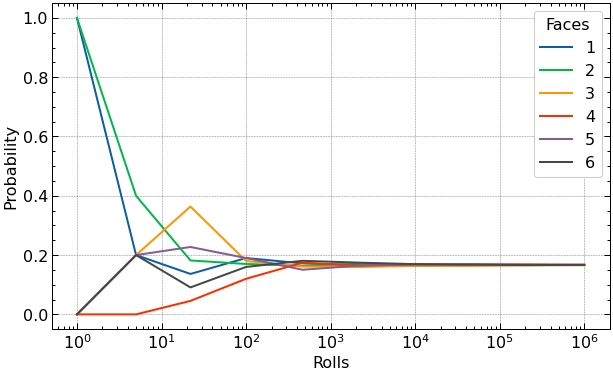

In [189]:
plt.figure(figsize=(10,6))
for face in range(n):
    plt.plot(checkpoints, probs[:, face], label=str(face+1))
    plt.xscale('log')
plt.ylabel('Probability')
plt.xlabel('Rolls')
plt.legend(title='Faces')

plt.savefig('figures/ex1.png')

### As we see, the probability effecively converges to $p_i \approx 0.166 \forall i$

## 2 - Simulation of a biased dice using a balanced dice

In [3]:
# We update the Dice class
class BalanceableDice(Dice):
    def __init__(self, P: np.ndarray) -> None:
        if np.sum(P) != 1:
            raise ValueError("P doesn't sum up to 1, got "+np.sum(P))
        super().__init__(n=len(P))
        self.P = P
        self._generate_drawers()

    def roll(self) -> int:
        r = np.random.uniform()
        drawer_id = int(np.floor(self.n_drawers*r))
        i = self.drawers[drawer_id] + 1
        return i 

    def _generate_drawers(self):
        self.n_drawers =  np.lcm.reduce((1/self.P).astype(int))
        self.drawers = np.zeros(self.n_drawers, dtype=int)
        current_drawer = 0
        for face in range(self.n):
            drawers_to_fill = int(self.P[face] * self.n_drawers)
            for _ in range(drawers_to_fill):
                self.drawers[current_drawer] = face
                current_drawer += 1

In [4]:
P=np.array([0.25, 0.25, 0.25, 1/8, 1/16, 1/16])
dice = BalanceableDice(P=P)

dice.roll()

2

In [16]:
# trials = int(1e6)
# checkpoints = np.ceil(np.linspace(0, trials, 10)).astype(int)
checkpoints = np.ceil(np.logspace(0, 6, 10)).astype(int)
trials = int(checkpoints[-1]) + 1

P  =np.array([0.25, 0.25, 0.25, 1/8, 1/16, 1/16])
n = len(P)
dice = BalanceableDice(P=P)

rolls = np.zeros(trials)
probs = np.zeros((10, n))
for trial in range(trials):
    rolls[trial] = dice.roll()

    if trial in checkpoints:
        for face in range(n):
            probs[np.where(checkpoints==trial)[0][0], face] = np.sum(rolls==face+1) / trial
        # print(trial)
        # print(rolls[:trial])
        # print(probs[np.where(checkpoints==trial)[0][0],:])

print('Stationary probability distribution:')
print(probs[-1, :])

Stationary probability distribution:
[0.2498 0.2498 0.2502 0.1249 0.0627 0.0626]


In [17]:
np.set_printoptions(precision=4)
print(repr(probs[-1, :]))

array([0.2498, 0.2498, 0.2502, 0.1249, 0.0627, 0.0626])


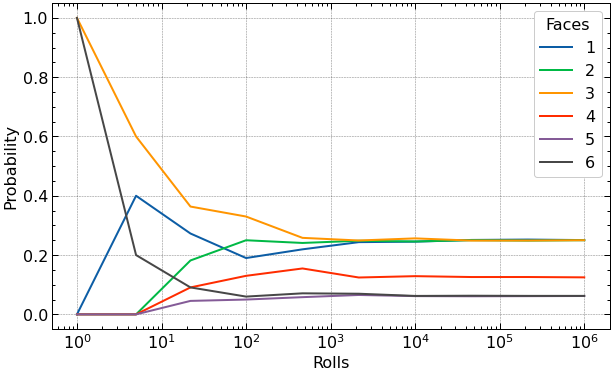

In [253]:
plt.figure(figsize=(10,6))
for face in range(n):
    plt.plot(checkpoints, probs[:, face], label=str(face+1))
    plt.xscale('log')
plt.ylabel('Probability')
plt.xlabel('Rolls')
plt.legend(title='Faces')

plt.savefig('figures/ex2.png')

### As we see, the probabilities effecively converge to $P \approx [1/4, 1/4, 1/4, 1/8, 1/16, 1/16]$

## 3 - Simulation of a biased coin toss

In [9]:
class BiasedCoin():
    def __init__(self, p: float) -> None:
        if (p<0) or (p>1):
            raise ValueError('p must be a probability, got '+p)
        self.p = p

    def toss(self):
        # 0 - tail, 1 - head
        r = np.random.uniform()
        return 0 if (r < self.p) else 1

In [479]:
coin = BiasedCoin(p=0.25)
coin.toss()

1

In [482]:
checks = 20
checkpoints = np.ceil(np.logspace(0, 6, checks)).astype(int)
trials = int(checkpoints[-1]) + 1

p = 0.5
coin = BiasedCoin(p=p)

tosses = np.full((trials,), -1)
probs = np.zeros((checks, 2))
for trial in range(trials):
    tosses[trial] = coin.toss()
    if trial in checkpoints:
        
        probs[np.where(checkpoints==trial)[0][0], 0] = np.sum(tosses==0) / (trial+1)
        probs[np.where(checkpoints==trial)[0][0], 1] = np.sum(tosses==1) / (trial+1)
        # print(trial)
        # print(rolls[:trial])
        # print(probs[np.where(checkpoints==trial)[0][0],:])

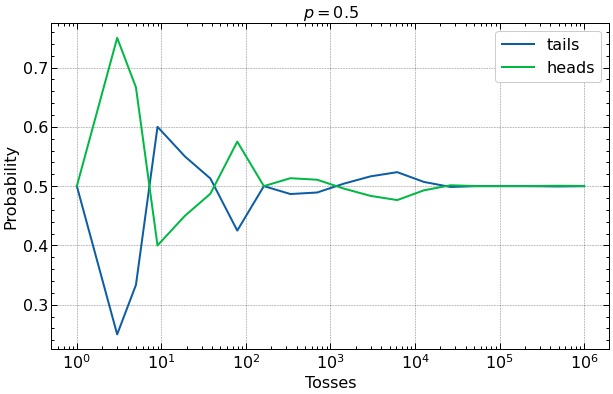

In [483]:
plt.figure(figsize=(10,6))
plt.plot(checkpoints, probs[:, 0], label='tails')
plt.plot(checkpoints, probs[:, 1], label='heads')

plt.xscale('log')
plt.ylabel('Probability')
plt.xlabel('Tosses')

plt.legend()
plt.title(r'$p = 0.5$')

plt.savefig('figures/ex3_0.5.png')

In [485]:
checks = 20
checkpoints = np.ceil(np.logspace(0, 6, checks)).astype(int)
trials = int(checkpoints[-1]) + 1

p = 0.25
coin = BiasedCoin(p=p)

tosses = np.full((trials,), -1)
probs = np.zeros((checks, 2))
for trial in range(trials):
    tosses[trial] = coin.toss()
    if trial in checkpoints:
        
        probs[np.where(checkpoints==trial)[0][0], 0] = np.sum(tosses==0) / (trial+1)
        probs[np.where(checkpoints==trial)[0][0], 1] = np.sum(tosses==1) / (trial+1)
        # print(trial)
        # print(rolls[:trial])
        # print(probs[np.where(checkpoints==trial)[0][0],:])

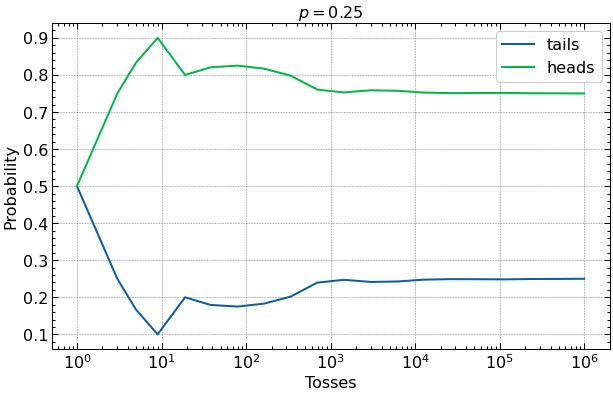

In [486]:
plt.figure(figsize=(10,6))
plt.plot(checkpoints, probs[:, 0], label='tails')
plt.plot(checkpoints, probs[:, 1], label='heads')

plt.xscale('log')
plt.ylabel('Probability')
plt.xlabel('Tosses')

plt.legend()
plt.title(r'$p = 0.25$')
plt.savefig('figures/ex3_0.25.png')

## 4 - Simulation of a biased dice using a biased coin

In [10]:
class CoinDice(Dice):
    
    def __init__(self, P: np.ndarray) -> None:
        if np.sum(P) != 1:
            raise ValueError("P doesn't sum up to 1, got "+np.sum(P))
        super().__init__(n=len(P))
        self.P = P

    # overload
    def roll(self):
        P_tmp = self.P.copy()
        for face in range(self.n):
            p = P_tmp[face]
            i = BiasedCoin(p).toss()
            if i == 0: # tails
                return face + 1
            else:
                # normalize P_tmp by remainging mass
                P_tmp = P_tmp / (1-p)

In [497]:
P=np.array([0.25, 0.25, 0.25, 1/8, 1/16, 1/16])
dice = CoinDice(P=P)
dice.roll()

3

In [12]:
checkpoints = np.ceil(np.logspace(0, 6, 10)).astype(int)
trials = int(checkpoints[-1]) + 1

P=np.array([0.25, 0.25, 0.25, 1/8, 1/16, 1/16])
dice = CoinDice(P=P)

rolls = np.zeros(trials)
probs = np.zeros((10, n))
for trial in range(trials):
    rolls[trial] = dice.roll()

    if trial in checkpoints:
        for face in range(n):
            probs[np.where(checkpoints==trial)[0][0], face] = np.sum(rolls==face+1) / trial
        # print(trial)
        # print(rolls[:trial])
        # print(probs[np.where(checkpoints==trial)[0][0],:])

print('Stationary probability distribution:')
print(probs[-1, :])

Stationary probability distribution:
[0.249596 0.250359 0.250143 0.125019 0.0625   0.062384]


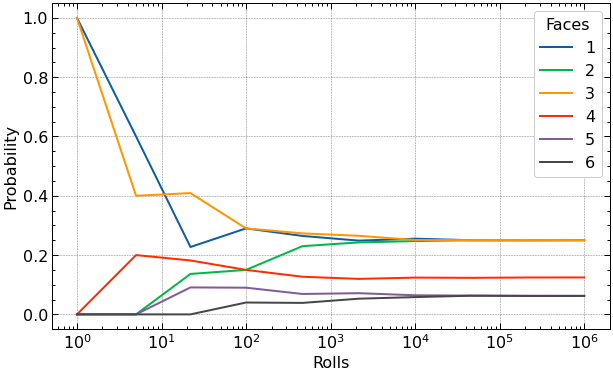

In [499]:
plt.figure(figsize=(10,6))
for face in range(n):
    plt.plot(checkpoints, probs[:, face], label=str(face+1))
    plt.xscale('log')
plt.ylabel('Probability')
plt.xlabel('Rolls')
plt.legend(title='Faces')

plt.savefig('figures/ex4.png')

### As we see, the probabilities effecively converge to $P \approx [1/4, 1/4, 1/4, 1/8, 1/16, 1/16]$

## 5 - Roulette method

In [20]:
P = np.array([0.25, 0.25, 0.25, 1/8, 1/16, 1/16])

class Roulette():
    def __init__(self, P) -> None:
        self.P = P

    def run(self) -> int:
        P_cumul = []
        for i in range(len(P)):
            pi = np.sum(P[:i+1])
            P_cumul.append(pi)
        
        r = np.random.uniform()
        event = np.where(np.array(P_cumul)>r)[0][0]
        return event + 1

In [582]:
r = Roulette(P)
event = r.run()

print(event)

3


In [21]:
checkpoints = np.ceil(np.logspace(0, 5, 10)).astype(int)
trials = int(checkpoints[-1]) + 1

n = 6
P=np.array([0.25, 0.25, 0.25, 1/8, 1/16, 1/16])
roul = Roulette(P)

rolls = np.zeros(trials)
probs = np.zeros((10, n))
for trial in range(trials):
    rolls[trial] = roul.run()

    if trial in checkpoints:
        for event in range(n):
            probs[np.where(checkpoints==trial)[0][0], event] = np.sum(rolls==event+1) / trial
        # print(trial)
        # print(rolls[:trial])
        # print(probs[np.where(checkpoints==trial)[0][0],:])

In [22]:
np.set_printoptions(precision=4)
print(repr(probs[-1, :]))

array([0.2468, 0.2524, 0.2518, 0.1252, 0.0609, 0.0629])


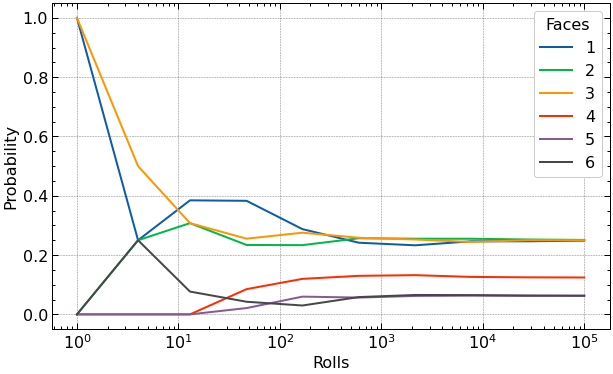

In [585]:
plt.figure(figsize=(10,6))
for face in range(n):
    plt.plot(checkpoints, probs[:, face], label=str(face+1))
    plt.xscale('log')
plt.ylabel('Probability')
plt.xlabel('Rolls')
plt.legend(title='Faces')

plt.savefig('figures/ex5.png')